In [1]:
import networkx as nx

def generate_graph_udpipe_word(file_path):

    G = nx.DiGraph()
    G.add_node("<root>", postag="NONE", deprel= "none")
    node_to_word = {0: "<root>"}
    edges_num = []

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            if line != '\n':
                tuples = line.split()
                G.add_node(tuples[1], postag=tuples[3], deprel=tuples[4])
                node_to_word[int(tuples[0])] = tuples[1]
                edges_num.append((int(tuples[2]), int(tuples[0])))
    
    for edge in edges_num:
        G.add_edge(node_to_word[edge[0]], node_to_word[edge[1]])
    
    return G

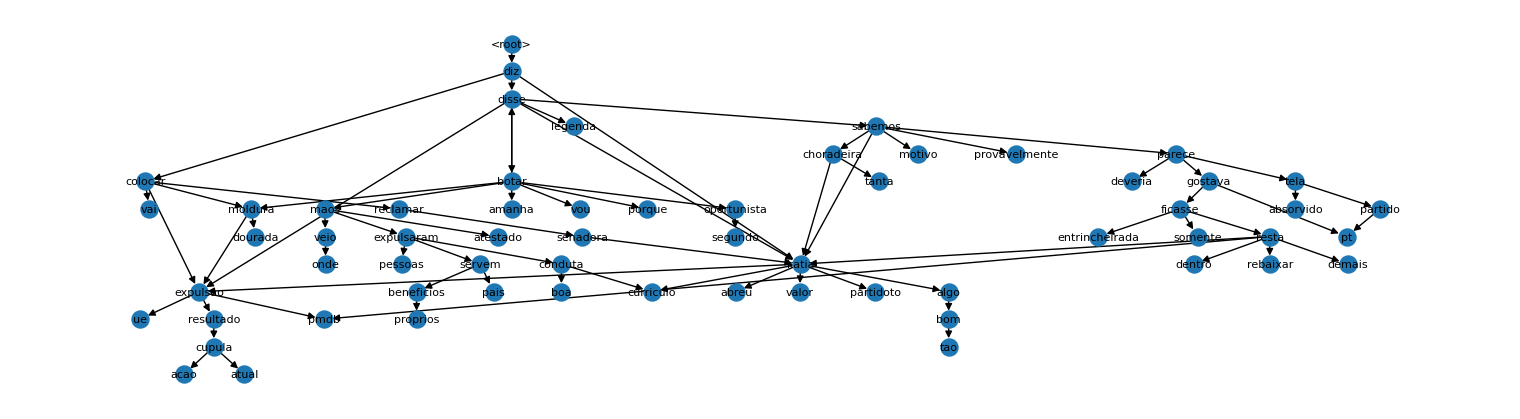

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import os

G = generate_graph_udpipe_word(os.path.join('data', 'udpipe_tuples', 'fake', '1.txt'))
G.nodes(data=True)
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

plt.figure(figsize=(15,4))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=150, font_size=8, font_family="sans-serif")
plt.savefig('../results/syntatic_graph_word.png', dpi=500)